In [216]:
from collections import Counter
from random import uniform

def trainPBM(click_log_path):
    """Returns rank-based click probabilites based on click log from file path.

    Args:
        click_log_path (string): File path.

    Returns:
        list: rank-based click probabilities.
    """
    pos_count = Counter()
    with open(click_log_path,'r') as f:
        for line in f:
            line = line.split()            
            # If line is query, update Q
            if line[2] == 'Q':
                Q = line[-10:]
            # else line is a click, check position
            else:
                # sometimes search is non-chronological. Skip these cases (<1% affected)
                try:
                    index = Q.index(line[3])+1
                    pos_count[index] += 1
                except:
                    pass
    # normalize          
    return [pos_count[key] / sum(pos_count.values()) for key in pos_count]

def randomProbsPBM(ranking):
    '''
    Generates the uniform probabilities for each document in a ranking. 
    Used for comparison in def assignClicksPBM
    
    Args:
        ranking (list): list of ranked documents represented by relevance.
        
    Return:
        list: A list of click probabilities (uniform) for each document in the ranking.
    '''
    click_probabilities = []
    for doc in ranking:
        click_probabilities.append(uniform(0,1))
    return click_probabilities


def assignClicksPBM(click_probabilities, P_click):
    '''
    Based on click probabilities, either do or do not assign a click to each document.
    
    Args:
        click_probabilities (list): uniform sampled probabilities.
        P_click (list): probabilities of clicking on document.
        
    Return:
        List: A list representing clicks with 1's on documents in ranking with the same index.
    '''
    clicks = []
    for i in range(len(click_probabilities)):
        if click_probabilities[i] < P_click[i]:
            clicks.append(1)
        else:
            clicks.append(0)
    return clicks

In [217]:
def positionBasedModel(click_log_path, ranking):
    '''
    Implementation of positionBasedModel. This model decides to click on a document
    with a probability P_click determined by log data positions.
    
    Args:
        click_log_path (String): Location of the click log.
        ranking (List): List of ranked documents represented by relevance.
        
    Return:
        List: A list representing clicks with 1's on documents in ranking with the same index.
    '''
    P_click = trainPBM(click_log_path)
    click_probabilities = randomProbsPBM(ranking)
    clicks = assignClicksPBM(click_probabilities, P_click[:len(click_probabilities)])
    return clicks

positionBasedModel('YandexRelPredChallenge.txt', ['R', 'NR', 'HR', 'HR', 'HR'])

[0, 1, 0, 1, 0]

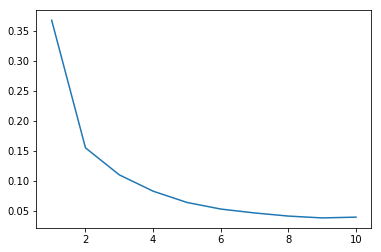

In [218]:
import matplotlib.pyplot as plt
x = trainPBM('YandexRelPredChallenge.txt')
plt.plot(list(range(1,len(x)+1)),x)
plt.show()